# Lab: Titanic EDA

This week is all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic's passenger manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Prework
Fork and clone this repo. At the end of this lab, you'll submit a pull request using the `Titanic.ipynb` notebook to answer the questions below.

This is a fairly common 'toy' dataset (although it's definitely dirty) used for teaching cleaning and some modeling. You can find out more here: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

## Step 1: Reading the data

1. If you look at the dataset directory, you'll see a .csv and a .txt file. The .csv is your data. The .txt is a brief data dictionary.
2. Take a minute read the data dictionary and understand how the data is structured.
3. In this notebook, load the csv into pandas.

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
# Q3:
df_data = pd.read_csv('./dataset/titanic.csv')

In [318]:
df_data.head(5)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

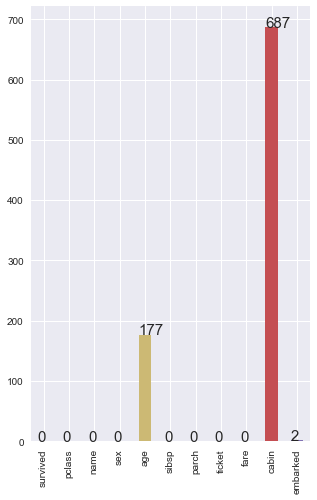

In [319]:
# Q1:
fig , ax = plt.subplots(figsize=(5,8))
df_data.isnull().sum().plot(kind='bar')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height(),str(i.get_height()), fontsize=15)

In [320]:
##Q2:
#'cabin' column has the most NaN values 
df_data.isnull().sum().max()

687

In [321]:
# Q3:
df_data.dropna(subset=['embarked'],inplace = True)

In [322]:
# Q4:
df_data['cabin'].fillna('¯\(ツ)/¯', inplace=True)

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [323]:
# Q1:
df_data['FamilyCount']= data['sibsp']+data['parch']

In [324]:
df_data.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [325]:
# Q2: 
df_data['title']= data.name.str.extract('([A-Za-z]+)\.',expand=False)

In [326]:
df_data['title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Don           1
Ms            1
Capt          1
Lady          1
Countess      1
Mme           1
Jonkheer      1
Name: title, dtype: int64

In [327]:
df_data['IsReverend']=df_data['title'].map(lambda t : 1 if t=='Rev' else 0) 

In [328]:
df_data['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [329]:
# Q3:
data=df_data.copy()
data= pd.concat([data,pd.get_dummies(data['embarked'],prefix='Embarked')],axis = 1)
data.drop('embarked',inplace=True, axis=1)

In [330]:
data.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,FamilyCount,title,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,Mr,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,Miss,0,0,0,1


In [331]:
data= pd.concat([data,pd.get_dummies(data['sex'],prefix='Sex')],axis = 1)
data.drop('sex',inplace=True, axis=1)

In [332]:
data.head(3)

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,FamilyCount,title,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,Mr,0,0,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,Mrs,0,1,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,Miss,0,0,0,1,1,0


In [333]:
data= pd.concat([data,pd.get_dummies(data['title'],prefix='Title')],axis = 1)
data.drop('title',inplace=True, axis=1)

In [334]:
data.head(3)

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,FamilyCount,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,0,0,0,0,0,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [335]:
# Q1:
survival_rate_overall =  len(data[data['survived']==1])/ len(data['survived'])
survival_rate_overall 

0.38245219347581555

In [336]:
# Q2:
survival_sex=data[(data['survived']==1)].groupby(['Sex_male','Sex_female']).size()
survival_sex

Sex_male  Sex_female
0         1             231
1         0             109
dtype: int64

In [337]:
sex_=data.groupby(['Sex_male','Sex_female']).size()
sex_

Sex_male  Sex_female
0         1             312
1         0             577
dtype: int64

In [342]:
survival_sex_rate =survival_sex/sex_
survival_sex_rate

Sex_male  Sex_female
0         1             0.740385
1         0             0.188908
dtype: float64

- Males have the worst survival rate 

In [343]:
# Q3:
survival_class=data[(data['survived']==1)].groupby('pclass').size()
survival_class

pclass
1    134
2     87
3    119
dtype: int64

In [344]:
class_=data.groupby('pclass').size()
class_

pclass
1    214
2    184
3    491
dtype: int64

In [345]:
survival_class_rate=survival_class/class_
survival_class_rate

pclass
1    0.626168
2    0.472826
3    0.242363
dtype: float64

In [346]:
# Q4:
survival_rev =data[(data['survived']==1) & (data['IsReverend']==1)]['IsReverend'].count()
survival_rev

0

In [347]:
#Q5:
len(data[(data['cabin']=='¯\(ツ)/¯') & (data['survived']==1)])/len(data[data['cabin']=='¯\(ツ)/¯'])

0.29985443959243085

In [348]:
#Q6:
len(data[(data['age'].isnull()) & (data['survived']==1)])/len(data[data['age'].isnull()])

0.2937853107344633

In [349]:
# Q7:
survival_Embarked=data[(data['survived']==1)].groupby(['Embarked_C','Embarked_Q','Embarked_S']).size()
survival_Embarked

Embarked_C  Embarked_Q  Embarked_S
0           0           1             217
            1           0              30
1           0           0              93
dtype: int64

In [350]:
Embarked_=data.groupby(['Embarked_C','Embarked_Q','Embarked_S']).size()
Embarked_

Embarked_C  Embarked_Q  Embarked_S
0           0           1             644
            1           0              77
1           0           0             168
dtype: int64

In [351]:
survival_Embarked_rate =survival_Embarked / Embarked_
survival_Embarked_rate

Embarked_C  Embarked_Q  Embarked_S
0           0           1             0.336957
            1           0             0.389610
1           0           0             0.553571
dtype: float64

In [352]:
# Q8:
survival_class_age_12=data[(data['survived']==1) & (data['age']<12)].groupby('pclass').size()
survival_class_age_12

pclass
1     3
2    17
3    19
dtype: int64

In [353]:
class_age_12_=data[data['age']<12].groupby('pclass').size()
class_age_12_

pclass
1     4
2    17
3    47
dtype: int64

In [354]:
survival_class_age_12 /class_age_12_

pclass
1    0.750000
2    1.000000
3    0.404255
dtype: float64

In [355]:
#Q 9:
data[data.Title_Capt==1]

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,FamilyCount,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
745,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,2,...,0,0,0,0,0,0,0,0,0,0


- There is only one capt and he did not survive

In [356]:
#Q 10:
ticket_cost = data[data.survived==0].fare.max()
ticket_cost

263.0

In [357]:
data[(data.fare==ticket_cost) & (data.survived ==0)]

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,FamilyCount,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
27,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0,C23 C25 C27,5,...,0,0,0,0,0,1,0,0,0,0
438,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0,C23 C25 C27,5,...,0,0,0,0,0,1,0,0,0,0


In [358]:
#Q 11:
survival_family_rate = len(data[(data.FamilyCount>0) & (data.survived ==1)]) / len(data[(data.FamilyCount>0)])
survival_family_rate

0.5056497175141242

In [359]:
survival_no_family_rate = len(data[(data.FamilyCount==0) & (data.survived ==1)]) / len(data[(data.FamilyCount==0)])
survival_no_family_rate

0.30093457943925234

## Step 5: Plotting
1. Using matplotlib and/or seaborn, create some charts from this data.


In [360]:
sns.set(style="darkgrid")

- I think we need to create some charts for the data before cleaning to help us to make decisions or at least before using `pd.get_dummies` such as (sex, title ).

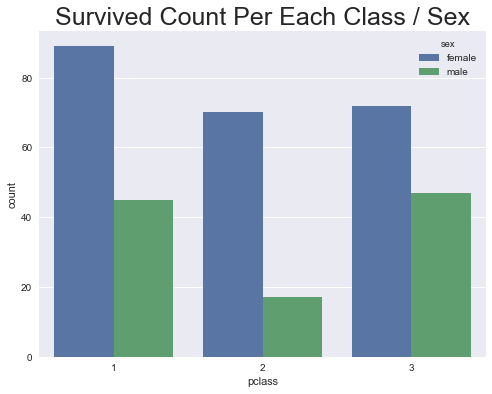

In [361]:
fig , ax = plt.subplots(figsize=(8,6))
sns.countplot(x='pclass',hue='sex',data=df_data[df_data.survived==1])
ax.set_title('Survived Count Per Each Class / Sex',fontsize=25);

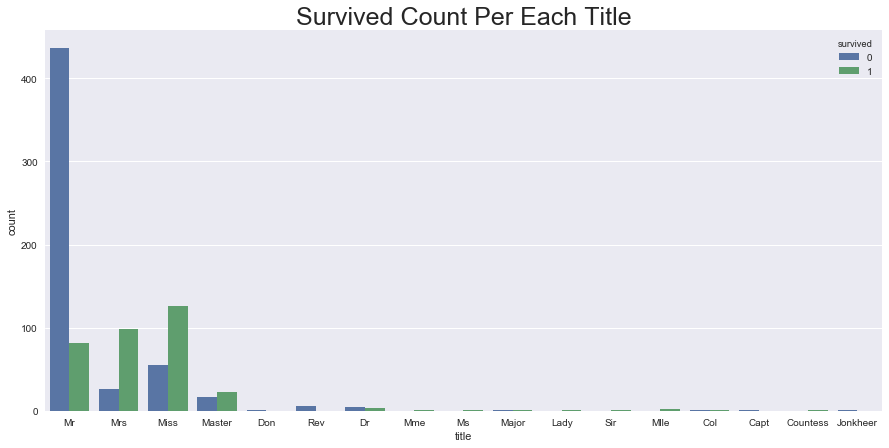

In [362]:
fig , ax = plt.subplots(figsize=(15,7))
sns.countplot(x='title',hue='survived',data=df_data)
ax.set_title('Survived Count Per Each Title',fontsize=25);

- Charts for rates i got in step4 :

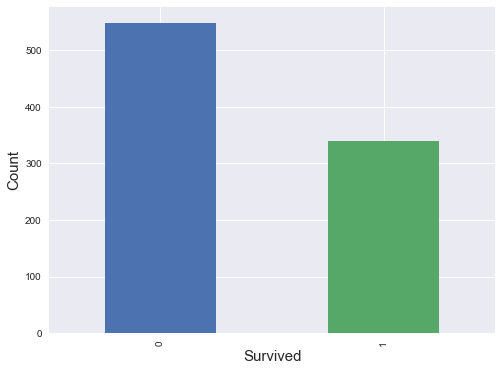

In [363]:
fig , ax = plt.subplots(figsize=(8,6))

# way1
data.groupby('survived').size().plot(kind='bar')
ax.set_ylabel('Count',fontsize=15);
ax.set_xlabel('Survived',fontsize=15);


# way2
#sns.countplot(x='survived',data=data)

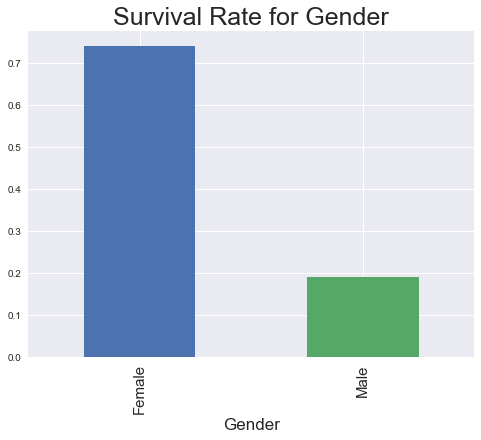

In [364]:
fig , ax = plt.subplots(figsize=(8,6))
survival_sex_rate.plot(kind='bar',ax=ax)
ax.set_xticklabels(('Female','Male'),fontsize=15)
ax.set_title('Survival Rate for Gender',fontsize=25)
ax.set_xlabel('Gender',fontsize=17);

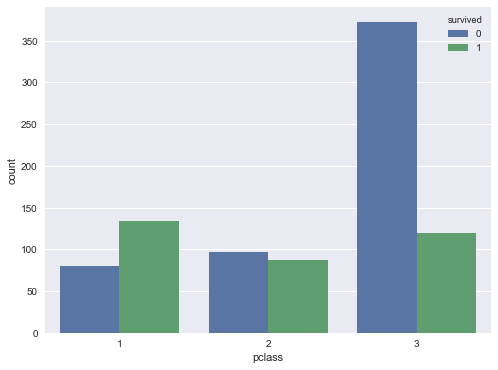

In [367]:
fig , ax = plt.subplots(figsize=(8,6))
sns.countplot(x="pclass", hue="survived", data=data );

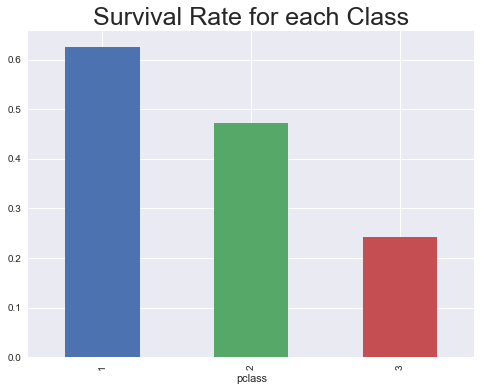

In [368]:
fig,ax = plt.subplots(figsize=(8,6))
survival_class_rate.plot(kind='bar')
ax.set_title('Survival Rate for each Class',fontsize=25);

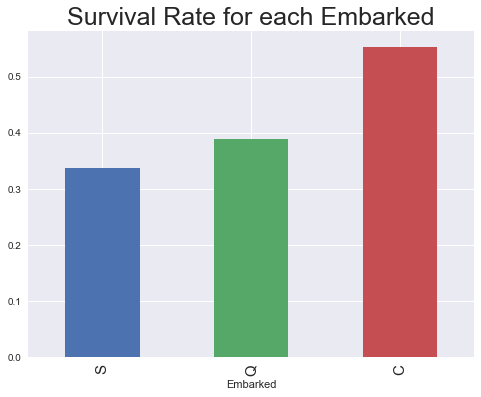

In [369]:
fig,ax = plt.subplots(figsize=(8,6))
survival_Embarked_rate.plot(kind='bar')
ax.set_xticklabels(('S','Q','C'),fontsize=15)
ax.set_title('Survival Rate for each Embarked',fontsize=25);
ax.set_xlabel('Embarked');

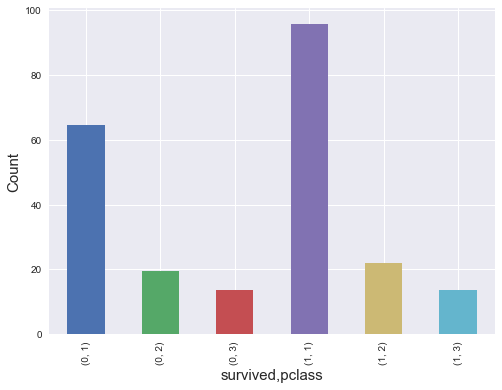

In [370]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_ylabel('Count',fontsize=15)
ax.set_xlabel('survived / pclass',fontsize=15)
data.groupby(['survived','pclass']).fare.mean().plot(kind='bar');

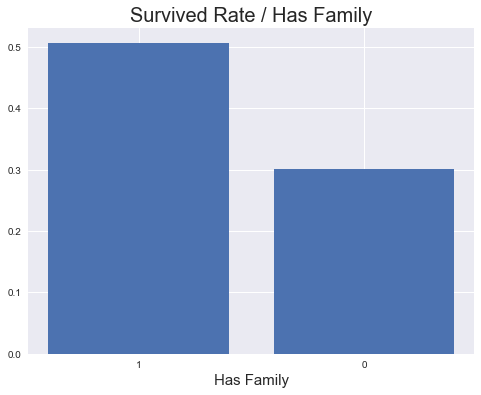

In [372]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Has Family',fontsize=15)
ax.set_title('Survived Rate / Has Family',fontsize=20)
plt.bar(['1','0'],[survival_family_rate,survival_no_family_rate]);
